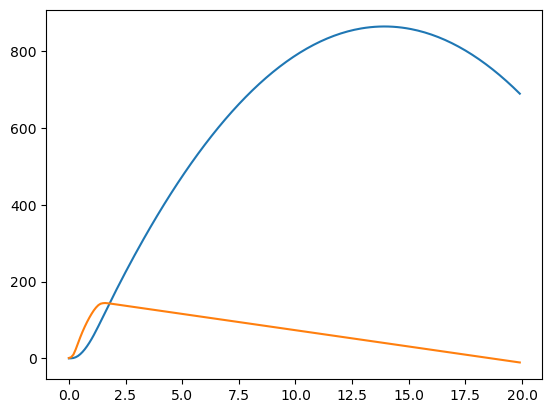

In [20]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

def W_from_L(results):
    # results - vector 1x3
    J = np.matrix('1 0 0; 0 1 0; 0 0 1')
    J_det = np.linalg.det(J)
    #create matrixes for angle velocities
    w_x_m = np.matrix(J)
    w_y_m = np.matrix(J)
    w_z_m = np.matrix(J)
    w_x_m[:, 0] = results
    w_y_m[:, 1] = results
    w_z_m[:, 2] = results
    w_x = np.linalg.det(w_x_m) / J_det
    w_y = np.linalg.det(w_y_m) / J_det
    w_z = np.linalg.det(w_z_m) / J_det
    #print(np.dot(J, np.array([w_x, w_y, w_z])))
    return np.matrix([[w_x], [w_y], [w_z]])


def Engine_Acceleration(time):
    #force = np.matrix('0.0; 0.0; 0.0');
    force = np.matrix([[0.0], [0.0], [0.0]])
    if time > 2:
        pass
    elif time < 0.2:
        force[0] = 44
    elif time < 0.3:
        force[0] = 186
    elif time < 0.4:
        force[0] = 243
    elif time < 0.6:
        force[0] = 250
    elif time < 0.8:
        force[0] = 211
    elif time < 1.0:
        force[0] = 180
    elif time < 1.2:
        force[0] = 150
    elif time < 1.4:
        force[0] = 103
    elif time < 1.6:
        force[0] = 34
    elif time < 1.8:
        force[0] = 5
    force /= 1.5 #mass of the rocket, should be time function
    return force


time_arr = []
vel_x_arr = []
vel_y_arr = []
vel_z_arr = []
full_vel_arr = []
alt_arr = []
distance_y_arr = []
distance_z_arr = []
distance_arr = []
w_arr = []
angles_RoE_arr = []

acc = np.array([[0.0], [0.0], [0.0]])
vel = np.matrix([[0.0], [0.0], [0.0]])
alt = np.matrix([[0.0], [0.0], [0.0]])
force_moments = np.matrix([[0.0], [0.0], [0.0]])
w = np.array([[0.0], [0.0], [0.0]])
#angles relatively of earth
angles_RoE = np.array([[0.0], [0.0], [0.0]])
A_RoE = np.eye(3).astype(np.float64)


alpha = angles_RoE[0][0]
beta = np.pi / 6
gamma = angles_RoE[2][0]
A = np.matrix([[cos(beta)*cos(gamma), -sin(gamma)*cos(beta), sin(beta)],
                   [sin(alpha)*sin(beta)*cos(gamma)+sin(gamma)*cos(alpha), -sin(alpha)*sin(beta)*sin(gamma)+cos(alpha)*cos(gamma), -sin(alpha)*cos(beta)],
                   [sin(alpha)*sin(gamma)-sin(beta)*cos(alpha)*cos(gamma), sin(alpha)*cos(gamma)+sin(beta)*sin(gamma)*cos(alpha), cos(alpha)*cos(beta)]])
A_RoE = np.dot(A_RoE, A).astype(np.float64)

delta_t = 0.1
for i in range(int(20/delta_t)):
    #temporary flight time
    time = i * delta_t
    time_arr.append(time)
    
    #acceleration calculations
    pre_acc = np.matrix(acc)
    acc = np.matrix([[0.0], [0.0], [0.0]])
    acc += Engine_Acceleration(time)    
    acc += np.dot(A_RoE, np.matrix([[-9.81], [0.0], [0.0]])).astype(np.float64)
    
    #linear velocity calculations
    pre_vel = vel
    vel += (acc+pre_acc) * 0.5 * delta_t
    vel_x_arr.append(vel.item(0))
    vel_y_arr.append(vel.item(1))
    vel_z_arr.append(vel.item(2))
    full_vel_arr.append(np.sqrt(vel.item(0)**2 + vel.item(1)**2 + vel.item(2)**2))
    
    #altitude and distance calculations
    alt += (vel+pre_vel) * 0.5 * delta_t
    alt_RoE = np.matmul(A_RoE**-1, alt).astype(np.float64)
    alt_arr.append(alt_RoE.item(0))
    distance_y_arr.append(alt_RoE.item(1))
    distance_z_arr.append(alt_RoE.item(2))
    distance_arr.append(np.sqrt(alt_RoE.item(1)**2 + alt_RoE.item(2)**2))
    if alt_RoE[0] <= 0:
        print('Ракета упала. Капут.')
        break;
    
    #force moments calculations
    pre_force_moments = force_moments
    force_moments = np.matrix([[0.0], [0.0], [0.0]])
    #rotation moments calculations
    rotation_moments = (force_moments+pre_force_moments) * 0.5 * delta_t
    #angle velocity calculation
    pre_w = w
    w = W_from_L(rotation_moments)
    w_arr.append(w.item(2))
    #angles relatively of earth calculations
    angles_RoE += (w+pre_w) * delta_t
    #print(angles_RoE)
    angles_RoE_arr.append(angles_RoE.item(1))
    alpha = angles_RoE[0][0]
    beta = angles_RoE[1][0]
    gamma = angles_RoE[2][0]
    A = np.matrix([[cos(beta)*cos(gamma), -sin(gamma)*cos(beta), sin(beta)],
                   [sin(alpha)*sin(beta)*cos(gamma)+sin(gamma)*cos(alpha), -sin(alpha)*sin(beta)*sin(gamma)+cos(alpha)*cos(gamma), -sin(alpha)*cos(beta)],
                   [sin(alpha)*sin(gamma)-sin(beta)*cos(alpha)*cos(gamma), sin(alpha)*cos(gamma)+sin(beta)*sin(gamma)*cos(alpha), cos(alpha)*cos(beta)]])
    A_RoE = np.dot(A_RoE, A).astype(np.float64)
    #print(A_RoE)
    



plt.plot(time_arr, alt_arr)
plt.plot(time_arr, vel_x_arr)
#plt.plot(time_arr, distance_arr)
#plt.plot(time_arr, angles_RoE_arr)

plt.show()
    

#print(W_from_L(np.matrix('1; 43; 1')))
#print(Engine_Acceleration(1))